# Program do szeregów Taylora


In [17]:
from sympy import (
    symbols,
    init_printing,
)
from sympy.calculus.util import continuous_domain
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = symbols("x", real=True)
init_printing(use_unicode=True)

### Funkcja do szeregu Taylora nr 1 - T1

---


In [18]:
def taylor1(f, n, x0=0, draw=False, n_to_draw=[]):
    # W1: wyliczenie składowych
    skladowe = []
    for ni in range(n + 1):
        skladowe.append(f.diff(x, ni).subs(x, x0) / sp.factorial(ni) * (x - x0) ** ni)

    # W2: wyliczenie n-tego przybliżenia
    n_aprox = sum(skladowe).simplify()

    if not draw:
        return skladowe, n_aprox

    domain = continuous_domain(f, x, sp.S.Reals)
    x_vals = [x for x in np.linspace(x0 - 5, x0 + 5, 100) if x in domain]
    f_vals = [f.subs(x, val) for val in x_vals]
    fmax, fmin = int(max(f_vals)) + 2, int(min(f_vals)) - 2
    n_aprox_vals = [n_aprox.subs(x, val) for val in x_vals]

    # W3: generowanie wykresu n-tego przybliżenia i f
    plt.plot(x_vals, f_vals, label="f", color="blue")
    plt.plot(x_vals, n_aprox_vals, label="N-aprox", color="red", linestyle="dashed")
    plt.ylim(fmin, fmax)
    plt.title("Funkcja f i n-tego przybliżenia")
    plt.legend()

    plt.show()

    # W4: generowanie wykresów
    plt.plot(x_vals, n_aprox_vals, label="N-aprox", color="red", linewidth=2)
    for i, func in enumerate(skladowe):
        if func == 0 or (len(n_to_draw) != 0 and i not in n_to_draw):
            continue
        func_vals = [func.subs(x, val) for val in x_vals]
        plt.plot(x_vals, func_vals, label=f"N{i}", color=f"C{i}", linestyle="dashed")

    plt.ylim(fmin, fmax)
    plt.title("Wykresy składowych i n-tego przybliżenia")
    plt.legend()

    plt.show()

    return skladowe, n_aprox

### Funkcja do szeregu Taylora nr 2 - T2

---


In [19]:
def taylor2(f, n1, n2, x0=0, draw=False, n_to_draw=[]):
    # W1: wyliczenie składowych i n-tych przybliżeń
    skladowe = []
    for ni in range(n2 + 1):
        skladowe.append(f.diff(x, ni).subs(x, x0) / sp.factorial(ni) * (x - x0) ** ni)

    przyblizenia = []
    for ni in range(n1, n2 + 1):
        przyblizenia.append(sum(skladowe[:ni]))

    if not draw:
        return przyblizenia

    # W2: narysowanie wykresów n-tych przybliżeń
    domain = continuous_domain(f, x, sp.S.Reals)
    x_vals = [x for x in np.linspace(x0 - 5, x0 + 5, 100) if x in domain]
    f_vals = [f.subs(x, val) for val in x_vals]
    fmax, fmin = int(max(f_vals)) + 2, int(min(f_vals)) - 2

    plt.plot(x_vals, f_vals, label="f", color="blue")
    for i, func in enumerate(przyblizenia):
        if func == 0 or (len(n_to_draw) != 0 and i + n1 not in n_to_draw):
            continue
        func_vals = [func.subs(x, val) for val in x_vals]
        plt.plot(x_vals, func_vals, label=f"N{i+n1}", color=f"C{i}", linestyle="dashed")

    plt.ylim(fmin, fmax)
    plt.title("Wykresy funkcji f i n-tych przybliżeń")
    plt.legend()

    plt.show()

    return przyblizenia

### Rozwiązanie zadań T3


a) f(x) = cos(x)


In [20]:
skladowe, n_przyblizenie = taylor1(sp.cos(x), 10)
display(n_przyblizenie)

b) f(x) = 1/(1−x)


In [21]:
skladowe, n_przyblizenie = taylor1(1 / (1 - x), 10)
display(n_przyblizenie)

c) f(x) = ln(1/(1−x))


In [22]:
skladowe, n_przyblizenie = taylor1(sp.ln(1 / (1 - x)), 10)
display(n_przyblizenie)

### Przykładowe wykorzystanie funkcji Taylora


#### Wykorzystanie funkcji z zadania T1

---


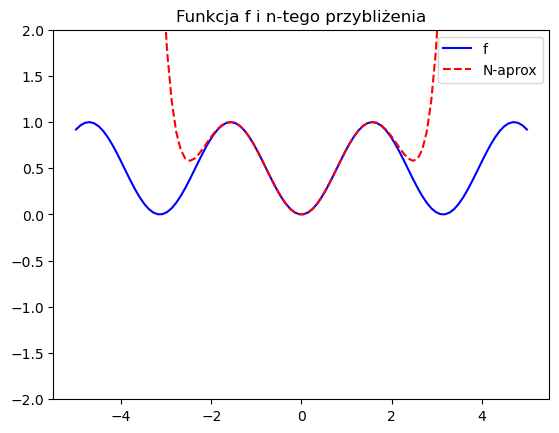

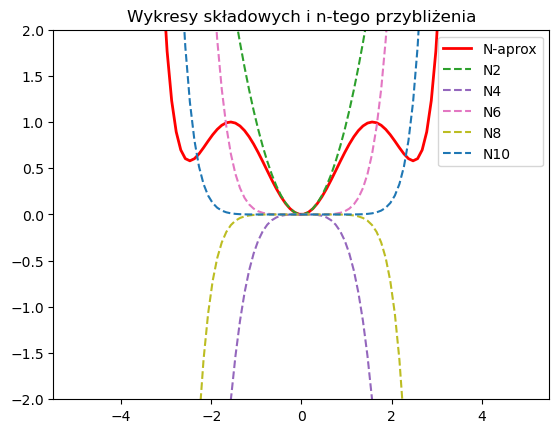

In [23]:
skladowe, n_aprox = taylor1(sp.sin(x) ** 2, 10, draw=True)
display(skladowe)
display(n_aprox)

#### Wykorzystanie funkcji z zadania T2

---


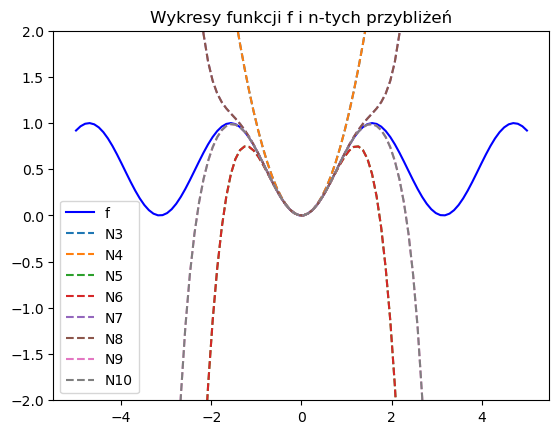

In [24]:
approximates = taylor2(sp.sin(x) ** 2, 3, 10, draw=True)
display(approximates)